In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from urllib import request, response, error, parse
from urllib.request import urlopen


In [2]:
page = requests.get('https://www.har.com/zipcode_77021/realestate/for_rent')
if page.status_code == 200:
  soup = BeautifulSoup(page.content, 'html.parser')
  print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/><title>77021 Homes for Rent - HAR.com</title>
<meta content="57 Homes for Rent in Houston, TX 77021. Browse photos, see new properties and research neighborhoods on HAR.com" name="description"/>
<meta content="HAR, 77021 real estate, 77021 homes, 77021 Homes for Rent, 77021 properties, 77021 listings" name="keywords"/>
<link href="https://www.har.com/zipcode_77021/realestate/for_rent" rel="canonical"/>
<meta content="HRIS, Inc." name="author">
<meta content="Copyright (c) 1997-2020 HRIS, Inc." name="copyright">
<meta content="Home Finder Search Results" property="og:title"/>
<link href="https://www.har.com/resources/images/common/favicon_32.png" rel="shortcut icon" sizes="32x32"/>
<link href="https://www.har.com/resources/images/common/favicon_48.png" rel="shortcut icon" sizes="

In [3]:
url='https://www.har.com/zipcode_77021/realestate/for_rent'
page = requests.get(url)

In [4]:
print(page.status_code)
print(page.content)
soup = BeautifulSoup(page.text, 'html.parser')
print(soup.prettify())

200
b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>77021 Homes for Rent - HAR.com</title>\n<meta name="description" content="57 Homes for Rent in Houston, TX 77021. Browse photos, see new properties and research neighborhoods on HAR.com">\n<meta name="keywords" content="HAR, 77021 real estate, 77021 homes, 77021 Homes for Rent, 77021 properties, 77021 listings">\n<link rel="canonical" href="https://www.har.com/zipcode_77021/realestate/for_rent"/>\n<meta name="author" content="HRIS, Inc."/>\n<meta name="copyright" content="Copyright (c) 1997-2020 HRIS, Inc."/>\n\n<meta property="og:title" content="Home Finder Search Results"/>\n  <link rel="shortcut icon" sizes="32x32" href="https://www.har.com/resources/images/common/favicon_32.png">\n  <link rel="shortcut icon" sizes="48x48" href="https://www.har.com/resources/images/common/favic

In [15]:
listing = []
for page in range(1,6):
  response = requests.get('https://www.har.com/search/dosearch/?page={}&for_sale=0&zip_code=77021'.format(str(page)))
  soup = BeautifulSoup(response.text, 'html.parser')
  properties = soup.find_all('div', class_='mpi_info')
  for x in properties:

    page = page
    addy = x.select_one('.address')
    mls = x.select_one('.mpi_mls')
    bed= x.find('div', {'class':'mpf_item'})
    beds= bed.get_text().replace('.','') if 'Bed' in str(bed.get_text()) else '-'
    bath = bed.find_next('div', {'class':'mpf_item'})
    bath2 = bath.find_previous('div', {'class':'mpf_item'})
    baths = bath.get_text().replace('.','') if 'Bath' in str(bath.get_text()) else (bath2.get_text().replace('.','') if 'Bath' in str(bath2.get_text()) else '-')
    stories1 = bath.find_next('div', {'class':'mpf_item'})
    stories3 = stories1.find_previous('div', {'class':'mpf_item'})
    try:
        stories2 = stories1.get_text().replace('.','') if 'Stories' in str(stories1.get_text()) else (stories3.get_text().replace('.','') if 'Stories' in str(stories3.get_text()) else '-')
    except: AttributeError
    
    try:
        b_sqft = stories1.find_next('div', {'class':'mpf_item'})
    except: AttributeError    
    
    try:
        b_sqft3 = b_sqft.find_previous('div', {'class':'mpf_item'})
    except: AttributeError   

    try:
        b_sqft2 = b_sqft.get_text().replace('.','') if 'Building' in str(b_sqft.get_text()) else (b_sqft3.get_text().replace('.','') if 'Building' in str(b_sqft3.get_text()) else '-')
    except: AttributeError
    garage = b_sqft.find_next('div', {'class':'mpf_item'})
    garage3 = garage.find_previous('div', {'class':'mpf_item'})
    garage2 = garage.get_text().replace('.','') if 'Garage' in str(garage.get_text()) else (garage3.get_text().replace('.','') if 'Garage' in str(garage3.get_text()) else '-')
    l_sqft = garage.find_next('div', {'class':'mpf_item'})
    l_sqft3 = l_sqft.find_previous('div', {'class':'mpf_item'})
    l_sqft4 = garage.find_previous('div', {'class':'mpf_item'})
    l_sqft5 = stories1.find_previous('div', {'class':'mpf_item'})
    l_sqft2 = l_sqft.get_text() if 'Lot' in str(l_sqft.get_text()) else (l_sqft3.get_text() if 'Lot' in str(l_sqft3.get_text()) else (l_sqft4.get_text() if 'Lot' in str(l_sqft4.get_text())\
                                                                        else (l_sqft.get_text() if 'Acre' in str(l_sqft.get_text()) else (l_sqft3.get_text() if 'Acre' in str(l_sqft3.get_text())\
                                                                        else (l_sqft3.get_text() if 'Acre' in str(l_sqft3.get_text()) else (l_sqft3.get_text() if 'Acre' in str(l_sqft3.get_text())\
                                                                        else (l_sqft4.get_text() if 'Acre' in str(l_sqft4.get_text()) else'-')))))))
    built = l_sqft.find_next('div', {'class':'mpf_item'})
    try:
        built3 = built.find_previous('div', {'class':'mpf_item'})
    except: AttributeError   
    built4 = l_sqft.find_previous('div', {'class':'mpf_item'})
    built5 = garage.find_previous('div', {'class':'mpf_item'})
    built6 = b_sqft.find_previous('div', {'class':'mpf_item'})
    try:
        built2 = built.get_text().replace('.','') if 'Built' in str(built.get_text()) else (built3.get_text().replace('.','') if 'Built' in str(built3.get_text())\
                                                                                        else (built4.get_text() if 'Built' in str(built4.get_text())\
                                                                                        else (built5.get_text() if 'Built' in str(built5.get_text())\
                                                                                              else (built6.get_text() if 'Built' in str(built6.get_text()) else'-'))))
    except: AttributeError   
    
    try:
        pool = built.find_next('div', {'class':'mpf_item'})
    except: AttributeError
        
    try:
      pool3 = pool.find_previous('div', {'class':'mpf_item'})
    except: AttributeError
    
    try:
        pool4 = built.find_previous('div', {'class':'mpf_item'})
    except: AttributeError
        
    pool5 = l_sqft.find_previous('div', {'class':'mpf_item'})
    pool6 = garage.find_previous('div', {'class':'mpf_item'})
    pool7 = b_sqft.find_previous('div', {'class':'mpf_item'})
    try:
      pool2 = pool.get_text().replace('.','') if 'Pool' in str(pool.get_text()) else (pool3.get_text().replace('.','') if 'Pool' in str(pool3.get_text())\
                                                                                        else (pool4.get_text() if 'Pool' in str(pool4.get_text())\
                                                                                        else (pool5.get_text() if 'Pool' in str(pool5.get_text())\
                                                                                              else (pool6.get_text() if 'Pool' in str(pool6.get_text())\
                                                                                                    else (pool7.get_text() if 'Pool' in str(pool7.get_text()) else'-')))))
    except: AttributeError
    
    listing.append({'page': page,
        'address':addy.get_text(),
                    'mls': mls.get_text(),
                    'bed':beds,
                    'bath': baths,
                    'stories': stories2,
                    'b_sqft': b_sqft2,
                    'garage': garage2,
                    'l_sqft': l_sqft2,
                    'built': built2,
                    'pool': pool2})
df = pd.DataFrame(listing)
df

,page,address,mls,bed,bath,stories,b_sqft,garage,l_sqft,built,pool
0,1,"3430 S Parkwood Drive, Houston, TX 77021",MLS# 9311854,6 Bed(s),6 Full & 2 Half Bath(s),2 Stories,"8,530 Building Sqft",4 Garage(s) / Detached,1.95 Acre(s),Built in 1941,Has Private Pool
1,1,"6323 E Mystic Meadow Street, Houston, TX 77021",MLS# 27049359,4 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,963 Building Sqft",-,"3,413 Lot Sqft.",Built in 2004,Has Private Pool
2,1,"6338 W Mystic Meadow, Houston, TX 77021",MLS# 2290785,3-4 Bed(s),3 Full & 1 Half Bath(s),-,"3,230 Building Sqft",2 Garage(s) / Attached,"3,066 Lot Sqft.",Built in 2002,No Private Pool
3,1,"2440 Charleston Street A, Houston, TX 77021",MLS# 39748093,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,494 Building Sqft",2 Garage(s) / Attached,"1,952 Lot Sqft.",Built in 2014,No Private Pool
4,1,"20 Hermann Park Ct Court, Houston, TX 77021",MLS# 83645296,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,117 Building Sqft",-,"1,664 Lot Sqft.",Built in 2013,No Private Pool
5,1,"3303 Parkwood Drive, Houston, TX 77021",MLS# 79742758,3 Bed(s),2 Full & 1 Half Bath(s),2 Stories,"2,700 Building Sqft",-,"13,728 Lot Sqft.",Built in 1937,No Private Pool
6,1,"3911 Griggs Road, Houston, TX 77021",MLS# 73776164,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,075 Building Sqft",2 Garage(s) / Attached,"2,200 Lot Sqft.",Built in 2019,No Private Pool
7,1,"2441 Charleston A, Houston, TX 77021",MLS# 33598387,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,122 Building Sqft",2 Garage(s) / Attached,"2,063 Lot Sqft.",Built in 2013,No Private Pool
8,1,"3114 S Macgregor Way, Houston, TX 77021",MLS# 64340448,4 Bed(s),3 Full Bath(s),2 Stories,"2,860 Building Sqft",2 Garage(s) / Attached,"11,900 Lot Sqft.",Built in 1950,No Private Pool
9,1,"3383 Tampa Street, Houston, TX 77021",MLS# 96650692,3 Bed(s),2 Full Bath(s),1 Stories,"2,091 Building Sqft",1 Garage(s) / Detached,"6,750 Lot Sqft.",Built in 1936,No Private Pool


In [16]:
price = []
for page in range(1,6):
    response = requests.get('https://www.har.com/search/dosearch/?page={}&for_sale=0&zip_code=77021'.format(str(page)))
    soup = BeautifulSoup(response.text, 'html.parser')
    for x in soup.find_all('div', class_='mpi_img'):
        p = x.find('div', class_='price')
        price.append({'rental_price': p.get_text(strip=True)})
df2 = pd.DataFrame(price)
df2

,rental_price
0,"$ 10,000"
1,"$ 4,000"
2,"$ 3,395"
3,"$ 2,900"
4,"$ 2,700"
5,"$ 2,550"
6,"$ 2,500"
7,"$ 2,395"
8,"$ 2,350"
9,"$ 2,250"


In [17]:
df

,page,address,mls,bed,bath,stories,b_sqft,garage,l_sqft,built,pool
0,1,"3430 S Parkwood Drive, Houston, TX 77021",MLS# 9311854,6 Bed(s),6 Full & 2 Half Bath(s),2 Stories,"8,530 Building Sqft",4 Garage(s) / Detached,1.95 Acre(s),Built in 1941,Has Private Pool
1,1,"6323 E Mystic Meadow Street, Houston, TX 77021",MLS# 27049359,4 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,963 Building Sqft",-,"3,413 Lot Sqft.",Built in 2004,Has Private Pool
2,1,"6338 W Mystic Meadow, Houston, TX 77021",MLS# 2290785,3-4 Bed(s),3 Full & 1 Half Bath(s),-,"3,230 Building Sqft",2 Garage(s) / Attached,"3,066 Lot Sqft.",Built in 2002,No Private Pool
3,1,"2440 Charleston Street A, Houston, TX 77021",MLS# 39748093,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,494 Building Sqft",2 Garage(s) / Attached,"1,952 Lot Sqft.",Built in 2014,No Private Pool
4,1,"20 Hermann Park Ct Court, Houston, TX 77021",MLS# 83645296,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,117 Building Sqft",-,"1,664 Lot Sqft.",Built in 2013,No Private Pool
5,1,"3303 Parkwood Drive, Houston, TX 77021",MLS# 79742758,3 Bed(s),2 Full & 1 Half Bath(s),2 Stories,"2,700 Building Sqft",-,"13,728 Lot Sqft.",Built in 1937,No Private Pool
6,1,"3911 Griggs Road, Houston, TX 77021",MLS# 73776164,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,075 Building Sqft",2 Garage(s) / Attached,"2,200 Lot Sqft.",Built in 2019,No Private Pool
7,1,"2441 Charleston A, Houston, TX 77021",MLS# 33598387,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,122 Building Sqft",2 Garage(s) / Attached,"2,063 Lot Sqft.",Built in 2013,No Private Pool
8,1,"3114 S Macgregor Way, Houston, TX 77021",MLS# 64340448,4 Bed(s),3 Full Bath(s),2 Stories,"2,860 Building Sqft",2 Garage(s) / Attached,"11,900 Lot Sqft.",Built in 1950,No Private Pool
9,1,"3383 Tampa Street, Houston, TX 77021",MLS# 96650692,3 Bed(s),2 Full Bath(s),1 Stories,"2,091 Building Sqft",1 Garage(s) / Detached,"6,750 Lot Sqft.",Built in 1936,No Private Pool


In [20]:
df2

,rental_price
0,"$ 10,000"
1,"$ 4,000"
2,"$ 3,395"
3,"$ 2,900"
4,"$ 2,700"
5,"$ 2,550"
6,"$ 2,500"
7,"$ 2,395"
8,"$ 2,350"
9,"$ 2,250"


In [21]:
har = df.merge(df2, left_index=True, right_index=True)
har

,page,address,mls,bed,bath,stories,b_sqft,garage,l_sqft,built,pool,rental_price
0,1,"3430 S Parkwood Drive, Houston, TX 77021",MLS# 9311854,6 Bed(s),6 Full & 2 Half Bath(s),2 Stories,"8,530 Building Sqft",4 Garage(s) / Detached,1.95 Acre(s),Built in 1941,Has Private Pool,"$ 10,000"
1,1,"6323 E Mystic Meadow Street, Houston, TX 77021",MLS# 27049359,4 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,963 Building Sqft",-,"3,413 Lot Sqft.",Built in 2004,Has Private Pool,"$ 4,000"
2,1,"6338 W Mystic Meadow, Houston, TX 77021",MLS# 2290785,3-4 Bed(s),3 Full & 1 Half Bath(s),-,"3,230 Building Sqft",2 Garage(s) / Attached,"3,066 Lot Sqft.",Built in 2002,No Private Pool,"$ 3,395"
3,1,"2440 Charleston Street A, Houston, TX 77021",MLS# 39748093,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,494 Building Sqft",2 Garage(s) / Attached,"1,952 Lot Sqft.",Built in 2014,No Private Pool,"$ 2,900"
4,1,"20 Hermann Park Ct Court, Houston, TX 77021",MLS# 83645296,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,117 Building Sqft",-,"1,664 Lot Sqft.",Built in 2013,No Private Pool,"$ 2,700"
5,1,"3303 Parkwood Drive, Houston, TX 77021",MLS# 79742758,3 Bed(s),2 Full & 1 Half Bath(s),2 Stories,"2,700 Building Sqft",-,"13,728 Lot Sqft.",Built in 1937,No Private Pool,"$ 2,550"
6,1,"3911 Griggs Road, Houston, TX 77021",MLS# 73776164,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,075 Building Sqft",2 Garage(s) / Attached,"2,200 Lot Sqft.",Built in 2019,No Private Pool,"$ 2,500"
7,1,"2441 Charleston A, Houston, TX 77021",MLS# 33598387,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,122 Building Sqft",2 Garage(s) / Attached,"2,063 Lot Sqft.",Built in 2013,No Private Pool,"$ 2,395"
8,1,"3114 S Macgregor Way, Houston, TX 77021",MLS# 64340448,4 Bed(s),3 Full Bath(s),2 Stories,"2,860 Building Sqft",2 Garage(s) / Attached,"11,900 Lot Sqft.",Built in 1950,No Private Pool,"$ 2,350"
9,1,"3383 Tampa Street, Houston, TX 77021",MLS# 96650692,3 Bed(s),2 Full Bath(s),1 Stories,"2,091 Building Sqft",1 Garage(s) / Detached,"6,750 Lot Sqft.",Built in 1936,No Private Pool,"$ 2,250"


In [22]:
har.to_csv('har77021.csv', index=False)

In [23]:
har.head()

,page,address,mls,bed,bath,stories,b_sqft,garage,l_sqft,built,pool,rental_price
0,1,"3430 S Parkwood Drive, Houston, TX 77021",MLS# 9311854,6 Bed(s),6 Full & 2 Half Bath(s),2 Stories,"8,530 Building Sqft",4 Garage(s) / Detached,1.95 Acre(s),Built in 1941,Has Private Pool,"$ 10,000"
1,1,"6323 E Mystic Meadow Street, Houston, TX 77021",MLS# 27049359,4 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,963 Building Sqft",-,"3,413 Lot Sqft.",Built in 2004,Has Private Pool,"$ 4,000"
2,1,"6338 W Mystic Meadow, Houston, TX 77021",MLS# 2290785,3-4 Bed(s),3 Full & 1 Half Bath(s),-,"3,230 Building Sqft",2 Garage(s) / Attached,"3,066 Lot Sqft.",Built in 2002,No Private Pool,"$ 3,395"
3,1,"2440 Charleston Street A, Houston, TX 77021",MLS# 39748093,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,494 Building Sqft",2 Garage(s) / Attached,"1,952 Lot Sqft.",Built in 2014,No Private Pool,"$ 2,900"
4,1,"20 Hermann Park Ct Court, Houston, TX 77021",MLS# 83645296,3 Bed(s),3 Full & 1 Half Bath(s),3 Stories,"2,117 Building Sqft",-,"1,664 Lot Sqft.",Built in 2013,No Private Pool,"$ 2,700"


In [24]:
har.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   page          57 non-null     int64 
 1   address       57 non-null     object
 2   mls           57 non-null     object
 3   bed           57 non-null     object
 4   bath          57 non-null     object
 5   stories       57 non-null     object
 6   b_sqft        57 non-null     object
 7   garage        57 non-null     object
 8   l_sqft        57 non-null     object
 9   built         57 non-null     object
 10  pool          57 non-null     object
 11  rental_price  57 non-null     object
dtypes: int64(1), object(11)
memory usage: 5.5+ KB


In [39]:
har['rental_price'] = har['rental_price'].replace(',', '').astype(int)
har['rental_price'].value_counts()

1300     3
1250     3
1950     2
775      2
1595     2
1350     2
650      2
1900     2
750      2
1495     2
1200     2
1650     2
2100     2
1400     2
1749     1
1055     1
2700     1
850      1
1990     1
10000    1
2500     1
3395     1
1047     1
2900     1
2250     1
950      1
2200     1
2395     1
1695     1
4000     1
677      1
900      1
1000     1
1450     1
1195     1
1050     1
2350     1
1100     1
2550     1
695      1
1275     1
Name: rental_price, dtype: int64

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
r_price = har.groupby(['rental_price'])['rental_price'].agg(['count']).reset_index()

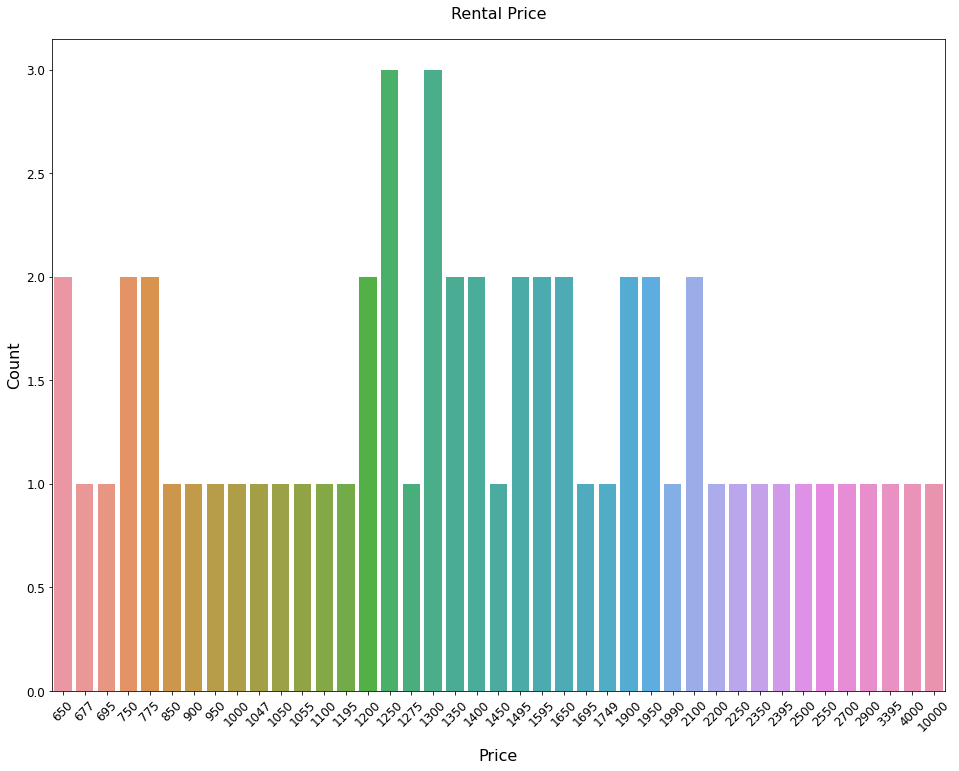

In [48]:
fig, ax = plt.subplots(figsize=(16,12))
ax= sns.barplot(x="rental_price", y="count", data=r_price, dodge=False)
plt.title('Rental Price', fontsize=16, pad=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Price', fontsize=16, labelpad=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

<AxesSubplot:ylabel='Frequency'>

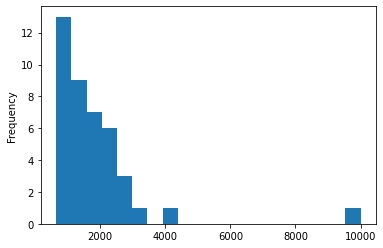

In [50]:
r_price['rental_price'].plot.hist(bins=20)